<a href="https://colab.research.google.com/github/Collin2210/Benjamini-Hochberg-Procedure/blob/main/Benjamini_Hochberg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# using BH method and Bonferroni correction
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

# import data
golub_data = pd.read_csv('/content/drive/MyDrive/bhmethods/golub.csv')

# Extracting gene expression data
gene_expression = golub_data.iloc[:, 6:]  # The 7th column starts with gene
group_labels = golub_data['cancer'].values

# Select allb and aml for initial analysis
unique_groups = np.unique(group_labels)
group1_expr = gene_expression[group_labels == 'allB']
group2_expr = gene_expression[group_labels == 'aml']

# Calculate p-value
p_values = np.array([
    ttest_ind(group1_expr.iloc[:, i], group2_expr.iloc[:, i], equal_var=False).pvalue
    for i in range(gene_expression.shape[1])
])


# BH methods
reject_bh, pvals_corrected_bh, _, _ = multipletests(p_values, alpha=0.05, method='fdr_bh')

# Bonferroni methods
reject_bonf, pvals_corrected_bonf, _, _ = multipletests(p_values, alpha=0.05, method='bonferroni')

# Summarize the results
results_df = pd.DataFrame({
    "Gene": gene_expression.columns,
    "Raw p-value": p_values,
    "BH Adjusted p-value": pvals_corrected_bh,
    "Significant (BH)": reject_bh,
    "Bonferroni Adjusted p-value": pvals_corrected_bonf,
    "Significant (Bonferroni)": reject_bonf
})

# sort by raw p-value
results_df = results_df.sort_values("Raw p-value")

# save results
results_df.to_csv('/content/drive/MyDrive/bhmethods/Untitled Folder/golub_analysis_results.csv', index=False)

print(results_df.head(20))


                  Gene   Raw p-value  BH Adjusted p-value  Significant (BH)  \
4972         Y08612_at  5.711122e-14         3.530308e-10              True   
2334         M89957_at  1.023797e-13         3.530308e-10              True   
6224  M84371_rna1_s_at  1.485611e-13         3.530308e-10              True   
2641    U05259_rna1_at  4.494345e-13         8.010047e-10              True   
6854         M31523_at  2.110483e-12         3.009127e-09              True   
6280       M31211_s_at  3.035659e-12         3.606869e-09              True   
1143         J05243_at  1.615946e-11         1.645725e-08              True   
1077         J03473_at  2.908407e-11         2.591754e-08              True   
4327         X59417_at  1.434492e-10         1.136277e-07              True   
757          D88270_at  1.880511e-10         1.309426e-07              True   
1961         M33680_at  2.100085e-10         1.309426e-07              True   
1684         M11722_at  2.204112e-10         1.30942

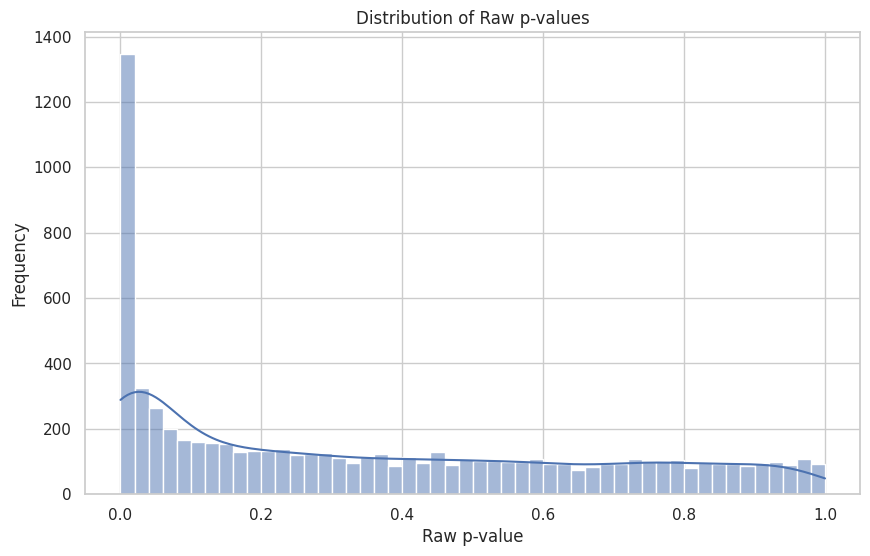

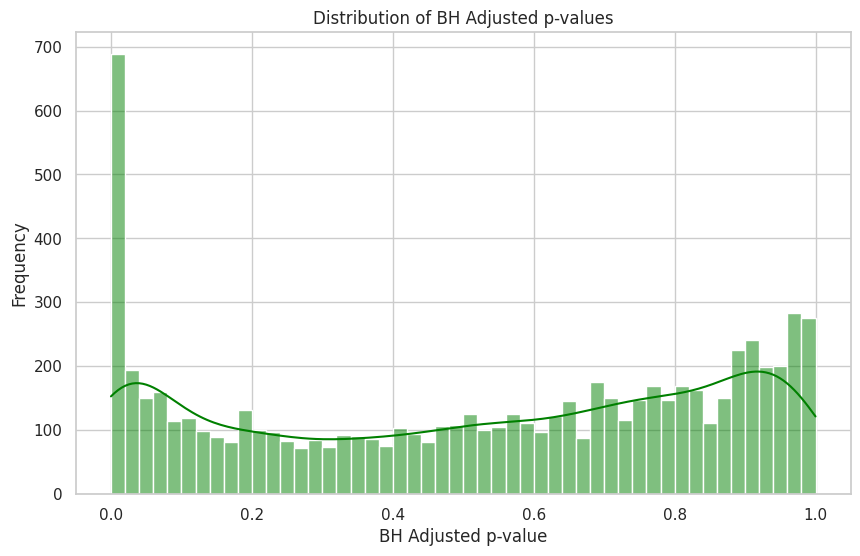

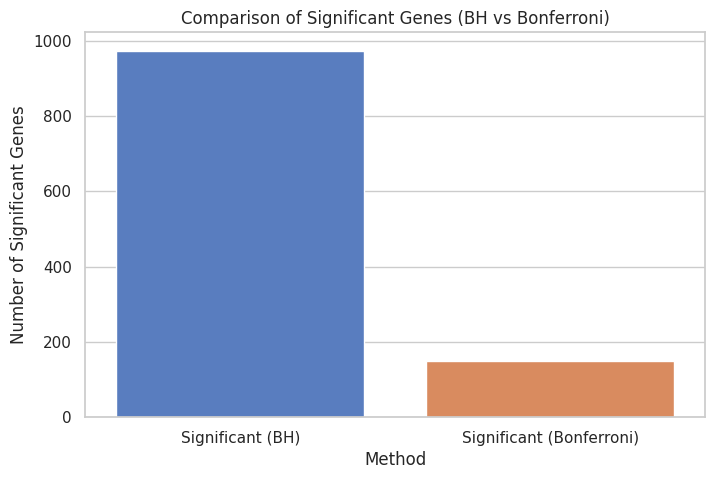

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import results
results = pd.read_csv('/content/drive/MyDrive/bhmethods/Untitled Folder/golub_analysis_results.csv')

# set style as whitegrid
sns.set(style="whitegrid")

# Figure 1: raw p-value distribution histogram
plt.figure(figsize=(10, 6))
sns.histplot(results['Raw p-value'], bins=50, kde=True)
plt.title('Distribution of Raw p-values')
plt.xlabel('Raw p-value')
plt.ylabel('Frequency')
plt.show()

# Figure 2：distribution histogram with bh methods
plt.figure(figsize=(10, 6))
sns.histplot(results['BH Adjusted p-value'], bins=50, kde=True, color='green')
plt.title('Distribution of BH Adjusted p-values')
plt.xlabel('BH Adjusted p-value')
plt.ylabel('Frequency')
plt.show()

# Figure 3：Comparison of the number of significant genes
significance_counts = [
    results['Significant (BH)'].sum(),
    results['Significant (Bonferroni)'].sum()
]
labels = ['Significant (BH)', 'Significant (Bonferroni)']

plt.figure(figsize=(8, 5))
sns.barplot(
    x=labels,
    y=significance_counts,
    hue=labels,
    palette='muted',
    legend=False
)
plt.title('Comparison of Significant Genes (BH vs Bonferroni)')
plt.ylabel('Number of Significant Genes')
plt.xlabel('Method')
plt.show()